<h1> CaseIA da TelecomPlus</h1>

In [31]:
# resolvendo as importações
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt

# Definição do modelo

Aqui irei definir o modelo. Como no diagrama abaixo, ele será um modelo que usa regressão logística para prever se é 0 ou 1 através da probabilidade da função sigmoid.

O modelo também é denso e tem três camadas internas. Sendo a camada 1, 2 e 3 tendo 30, 10 e 5 neurônios e usando a função de ativação relu. A camada 4 ou camada de saída usa a função de ativação sigmoid.

<center><img src="logistic1.jpg" width="50%" /></center>

In [32]:
# Definição das funções a serem usadas
def relu(x):
    return np.maximum(x,0)
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

Definida a função para propagar para frente os valores até chegar no output layer.

In [33]:
def forward_propagation(X, W1, b1, W2, b2, W3, b3, W4, b4, cache={}):

    # m = X.shape[1]

    z1 = np.dot(W1, X) + b1
    a1 = relu(z1)

    z2 = np.dot(W2, a1) + b2 
    a2 = relu(z2)

    z3 = np.dot(W3, a2) + b3 
    a3 = relu(z3)

    z4 = np.dot(W4, a3) + b4
    a4 = sigmoid(z4)

    cache["z1"] = z1 
    cache["a1"] = a1 
    cache["z2"] = z2 
    cache["a2"] = a2 
    cache["z3"] = z3 
    cache["a3"] = a3 
    cache["z4"] = z4 
    cache["a4"] = a4 

    return a4, cache

Funções das derivadas da relu e sigmoid, a serem usadas na propagação reversa, na qual se calcularão os novos pesos com gradiente descendente.

In [34]:
def relu_derivative(x):
    return (x > 0).astype(float)

def sigmoid_derivative(x):
    s = 1 / (1 + np.exp(-x))
    return s * (1-s)

def backward_propagation(X,y, cache, W1, b1, W2, b2, W3, b3, W4, b4, learning_rate=0.04):

    m = X.shape[1]

    z1, a1 = cache["z1"], cache["a1"]
    z2, a2 = cache["z2"], cache["a2"]
    z3, a3 = cache["z3"], cache["a3"]
    z4, a4 = cache["z4"], cache["a4"]

    dz4 = a4 - y
    dW4 = (1/m) * np.dot(dz4,a3.T)
    db4 = (1/m) * np.sum(dz4, axis=1, keepdims=True)

    da3 = np.dot(W4.T, dz4)
    dz3 = da3 * relu_derivative(z3)
    dW3 = (1/m) * np.dot(dz3, a2.T)
    db3 = (1/m) * np.sum(dz3, axis=1, keepdims=True)

    da2 = np.dot(W3.T, dz3)
    dz2 = da2 * relu_derivative(z2)
    dW2 = (1/m) * np.dot(dz2, a1.T)
    db2 = (1/m) * np.sum(dz2, axis=1, keepdims=True)

    da1 = np.dot(W2.T, dz2)
    dz1 = da1 * relu_derivative(z1)
    dW1 = (1/m) * np.dot(dz1, X.T)
    db1 = (1/m) * np.sum(dz1, axis=1, keepdims=True)


    W1 -= learning_rate * dW1
    b1 -= learning_rate * db1
    W2 -= learning_rate * dW2
    b2 -= learning_rate * db2
    W3 -= learning_rate * dW3
    b3 -= learning_rate * db3
    W4 -= learning_rate * dW4
    b4 -= learning_rate * db4
    
    return W1, b1, W2, b2, W3, b3, W4, b4

Função loss para se ver se a função está descendo

In [35]:
def binary_cross_entropy_loss(y_true, y_pred, epsilon=1e-15):
    y_pred = y_pred.reshape(-1,1)
    y_true = y_true.reshape(-1,1)

    y_pred = np.clip(y_pred, epsilon, 1 - epsilon)  
    loss = -np.mean(y_true * np.log(y_pred) + (1 - y_true) * np.log(1 - y_pred))
    
    return loss

Inicializa os pesos

In [36]:
def initialize_weights(input_dim):
    # input_dim = X.shape[0]

    np.random.seed(333)  
    

    W1 = np.random.randn(30,input_dim) * np.sqrt(2 / input_dim)  
    b1 = np.zeros((30,1))
    

    W2 = np.random.randn(10,30) * np.sqrt(2 / 30) 
    b2 = np.zeros((10, 1))
    

    W3 = np.random.randn(5, 10) * np.sqrt(2 / 10) 
    b3 = np.zeros((5, 1))
    

    W4 = np.random.randn(1, 5) * np.sqrt(1 / 5)  
    b4 = np.zeros((1, 1))
    
    return W1, b1, W2, b2, W3, b3, W4, b4

Treina o modelo com base nas funções fornecidas e devolve os pesos e os losses.

In [37]:
def train_model(X, y, weights, learning_rate, epochs):
    W1, b1, W2, b2, W3, b3, W4, b4 = weights
    losses = []
    for epoch in range(epochs):

        a4, cache = forward_propagation(X, W1, b1, W2, b2, W3, b3, W4, b4)

        loss = binary_cross_entropy_loss(y, a4)

        W1, b1, W2, b2, W3, b3, W4, b4 = backward_propagation(X, y, cache, W1, b1, W2, b2, W3, b3, W4, b4, learning_rate)

        losses.append(loss)
 
        if epoch % 100 == 0:
            print(f"Epoch {epoch}, Loss: {loss}")
    return W1, b1, W2, b2, W3, b3, W4, b4, losses

Agora vamos ver os dados

In [38]:
# vendo os dados
dados_clientes = pd.read_csv("dados_clientes.csv")
dados_clientes.head(5)

,id_cliente,idade,genero,estado_civil,tempo_como_cliente,tipo_contrato,forma_pagamento,suporte_contatado,chamados_abertos,tempo_medio_atendimento,reclamacoes,atrasos_pagamento,renda_faixa,servicos_assinados,produtos_assinados,valor_mensal,total_gasto,churn
0,c19f9c98-53b9-4332-bc13-5ef6140340bf,44,Feminino,Solteiro,53,Mensal,Cartão,3,0,27.13,0,1,5000-10000,1,['Produto B'],92.50,5008.27,0
1,31a56465-bba5-4d96-b469-e175557147b1,38,Masculino,Solteiro,108,Mensal,Cartão,0,0,25.33,1,2,10000-50000,2,['Produto A' 'Produto B'],154.26,17019.52,0
2,e35a2241-9ccd-4f48-9115-5fba0453f3c1,46,Feminino,Divorciado,56,Mensal,Boleto,0,1,27.43,2,3,1000-5000,1,['Produto E'],202.58,11589.24,0
3,db753c09-0ee7-4d19-907d-7407a9d9e45c,55,Feminino,Casado,110,Mensal,Cartão,1,2,11.50,2,3,5000-10000,1,['Produto F'],344.72,38737.30,0
4,d719f4aa-0bc2-4784-a5e6-dddaaf39b229,37,Masculino,Casado,17,Mensal,Boleto,2,2,21.42,0,2,5000-10000,5,['Produto C' 'Produto B' 'Produto D' 'Produto ...,871.10,15128.20,1


#  Pipeline de pré-processamento de dados

Se separa as colunas numéricas e categóricas manualmente.

In [39]:
# colunas separadas em categóricas e numéricas
cols_numericas = ['idade', 'tempo_como_cliente', 'suporte_contatado', 'chamados_abertos', 'tempo_medio_atendimento', 'reclamacoes', 'atrasos_pagamento', 'servicos_assinados', 'valor_mensal', 'total_gasto']
cols_categoricas = ['genero', 'estado_civil', 'tipo_contrato', 'forma_pagamento', 'renda_faixa', 'produtos_assinados']

In [40]:
df = dados_clientes.copy()
X = df.drop(columns=["churn", "id_cliente"])
y = df["churn"]

Se separa os datasets de treino e teste.

In [41]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=333)

Tratamento das colunas categóricas com tratamento para valores ausentes, criando uma lista com todos os valores zero.

In [42]:
# hot encode as colunsa categóricas
X_hot = {}
for col in cols_categoricas:
    encoded = []
    if col == "produtos_assinados":
        
        for val in X_train[col]:
            temp = [0]*6
            if val == np.isnan :
                encoded.append([0,0,0,0,0,0])
            else :
                val = val.strip("[]")
                val = val.replace("Produto", "")
                val = val.replace("\'", "")
                val = val.split()
                
                for letter in val :
                    if letter == "A":
                        temp[0] = 1
                    if letter == "B":
                        temp[1] = 1
                    if letter == "C":
                        temp[2] = 1
                    if letter == "D":
                        temp[3] = 1
                    if letter == "E":
                        temp[4] = 1
                    if letter == "F":
                        temp[5] = 1
                encoded.append(temp)
        X_hot['produtos_assinados'] = encoded
    else:
        total_unique = len(X_train[col].unique())
        unique_values = list(X_train[col].unique())
        temp = []
        for val in X_train[col]:
            encoded = [0] * total_unique
            if val == np.isnan:
                temp.append(encoded)
            else:
                idx = unique_values.index(val)
                encoded[idx] = 1
                temp.append(encoded)
        X_hot[col] = temp

Tratamento das variáveis numéricas, colocando a média delas e normalizando pelo maior valor

In [43]:
# normalizar as colunas numéricas
X_num = {}
for col in cols_numericas:
    temp = []
    max_value = X_train[col].max()
    mean_value = X_train[col].mean()
    for val in X_train[col]:
        if val == np.isnan:
            temp.append(mean_value / max_value)
        else:
            temp.append(val / max_value)
    X_num[col] = temp

In [44]:
# estágio de debug
print("\n=== DEBUGGING X_hot ===")
neurons_hot = 0
for key in X_hot:
    # print(f"{key}: {len(X_hot[key])} samples")
    # print(f"First sample shape: {np.array(X_hot[key][0]).shape}")
    neurons_hot += np.array(X_hot[key][0]).shape[0]
print(neurons_hot)
neurons_num = 0
print("\n=== DEBUGGING X_num ===") 
for key in X_num:
    # print(f"{key}: {len(X_num[key])} samples")
    # print(f"First sample value: {X_num[key][0]}")
    neurons_num += 1
print(neurons_num)


=== DEBUGGING X_hot ===
21

=== DEBUGGING X_num ===
10


Preparar os dados na forma da matrix de inputs X

In [45]:
def prepare_training_data(X_num, X_hot, y):
    keys = sorted(X_hot.keys())
    matrix_h = []
    n_samples = len(X_hot[keys[0]])
    # print(n_samples)
    for i in range(n_samples):
        row = []
        for key in keys:

            features = X_hot[key][i]
            for e in features:
                row.append(X_hot[key][i][e])
        matrix_h.append(row)

    matrix_h = np.array(matrix_h).T
    # print(matrix)
    # print(matrix.shape[0])
    matrix_n = []
    keys = sorted(X_num.keys())
    for i in range(n_samples):
        row = []
        for key in keys:

            features = X_num[key][i]
            row.append(features)
            # row.append(feature)
        matrix_n.append(row)

    matrix_n = np.array(matrix_n).T
    # print(matrix_n)
    # print(matrix_n.shape[0])
    matrix = np.vstack((matrix_h, matrix_n))
    # print(matrix)
    # print(matrix.shape[0])
    # print(matrix.shape[0])

    return matrix 

X_train_processed = prepare_training_data(X_num, X_hot, y)
print(X_train_processed.shape[0])

31


Treinamento do modelo e recebimento dos pesos

In [46]:
# # Treinamento do modelo 
input_dim = neurons_hot + neurons_num
weights = initialize_weights(input_dim)
learning_rate = 0.04
epochs = 5000
y_train_processed = y_train.to_numpy()

W1, b1, W2, b2, W3, b3, W4, b4, losses = train_model(X_train_processed, y_train_processed, weights, learning_rate, epochs)

Epoch 0, Loss: 0.9391096793226255
Epoch 100, Loss: 0.6452219594619546
Epoch 200, Loss: 0.63966881152508
Epoch 300, Loss: 0.6387755229189305
Epoch 400, Loss: 0.638408060825525
Epoch 500, Loss: 0.6374734228895678
Epoch 600, Loss: 0.6363319164384204
Epoch 700, Loss: 0.6351968846274731
Epoch 800, Loss: 0.6339575796977178
Epoch 900, Loss: 0.6324601001784907
Epoch 1000, Loss: 0.6303055038146745
Epoch 1100, Loss: 0.6266659541019626
Epoch 1200, Loss: 0.6206574636504804
Epoch 1300, Loss: 0.613299386081811
Epoch 1400, Loss: 0.6052827242943051
Epoch 1500, Loss: 0.5972062439714492
Epoch 1600, Loss: 0.5900011226429069
Epoch 1700, Loss: 0.5841752994380883
Epoch 1800, Loss: 0.5798504935908955
Epoch 1900, Loss: 0.5768800152065916
Epoch 2000, Loss: 0.5748825770116206
Epoch 2100, Loss: 0.5735260651998454
Epoch 2200, Loss: 0.5726153995174521
Epoch 2300, Loss: 0.5719618603780706
Epoch 2400, Loss: 0.571487025838069
Epoch 2500, Loss: 0.5711155414860817
Epoch 2600, Loss: 0.5708205277913405
Epoch 2700, Loss: 

Processando agora o dataset de teste para ser avaliado

In [47]:
# Preparar X_test
# hot encode as colunsa categóricas
X_hot = {}
for col in cols_categoricas:
    encoded = []
    if col == "produtos_assinados":
        
        for val in X_test[col]:
            temp = [0]*6
            if val == np.isnan :
                encoded.append([0,0,0,0,0,0])
            else :
                val = val.strip("[]")
                val = val.replace("Produto", "")
                val = val.replace("\'", "")
                val = val.split()
                
                for letter in val :
                    if letter == "A":
                        temp[0] = 1
                    if letter == "B":
                        temp[1] = 1
                    if letter == "C":
                        temp[2] = 1
                    if letter == "D":
                        temp[3] = 1
                    if letter == "E":
                        temp[4] = 1
                    if letter == "F":
                        temp[5] = 1
                encoded.append(temp)
        X_hot['produtos_assinados'] = encoded
    else:
        total_unique = len(X_test[col].unique())
        unique_values = list(X_test[col].unique())
        temp = []
        for val in X_test[col]:
            encoded = [0] * total_unique
            if val == np.isnan:
                temp.append(encoded)
            else:
                idx = unique_values.index(val)
                encoded[idx] = 1
                temp.append(encoded)
        X_hot[col] = temp

# normalizar as colunas numéricas
X_num = {}
for col in cols_numericas:
    temp = []
    max_value = X_test[col].max()
    mean_value = X_test[col].mean()
    for val in X_test[col]:
        if val == np.isnan:
            temp.append(mean_value / max_value)
        else:
            temp.append(val / max_value)
    X_num[col] = temp

X_test_processed = prepare_training_data(X_num, X_hot, y)
y_test_processed = y_test.to_numpy()

Avaliação do modelo

In [54]:
def evaluate_model(X_test, y_test, W1, b1, W2, b2, W3, b3, W4, b4):
    preds, _ = forward_propagation(X_test, W1, b1, W2, b2, W3, b3, W4, b4)
    preds = (preds > 0.5).astype(int)
    accuracy = np.mean(preds == y_test)
    return accuracy, preds   # devolve tuple com 2 itens



In [63]:
accuracy, preds = evaluate_model(X_test_processed, y_test_processed, W1, b1, W2, b2, W3, b3, W4, b4)

print(f"A acurácia do modelo é:{accuracy*100 :.2f} %")

A acurácia do modelo é:72.94 %


In [64]:
desafio = pd.read_csv('desafio.csv')
desafio.head(5)

,id_cliente,idade,genero,estado_civil,tempo_como_cliente,tipo_contrato,forma_pagamento,suporte_contatado,chamados_abertos,tempo_medio_atendimento,reclamacoes,atrasos_pagamento,renda_faixa,servicos_assinados,produtos_assinados,valor_mensal,total_gasto
0,f6337b09-c973-453d-b113-f1daa4213b0a,44,Masculino,Solteiro,48,Anual,Boleto,0,0,10.67,1,2,10000-50000,1,['Produto F'],311.07,15304.67
1,1ecbc358-bda2-4e63-97ba-51fcec179785,38,Masculino,Solteiro,66,Mensal,Débito,0,3,19.76,0,1,10000-50000,2,['Produto F' 'Produto E'],567.69,38404.30
2,7bdd4b1d-c95c-409b-aabd-b857ee1795df,46,Masculino,Divorciado,16,Anual,Boleto,2,2,9.71,0,0,10000-50000,0,[],0.00,0.00
3,ffa2dd54-558d-45cb-81fd-43be62752441,55,Masculino,Casado,80,Mensal,Débito,1,0,8.48,0,2,1000-5000,3,['Produto C' 'Produto E' 'Produto B'],383.53,31449.52
4,e8b15be3-822c-4e7d-a9a8-e2aae6091630,37,Masculino,Solteiro,53,Mensal,Boleto,2,2,12.96,0,4,10000-50000,2,['Produto D' 'Produto F'],589.32,32014.87


In [78]:
df = desafio.copy()
X = df.drop(columns=["id_cliente"])
# Preparar X_test
# hot encode as colunsa categóricas
X_hot = {}
for col in cols_categoricas:
    encoded = []
    if col == "produtos_assinados":
        
        for val in X[col]:
            temp = [0]*6
            if val == np.isnan :
                encoded.append([0,0,0,0,0,0])
            else :
                val = val.strip("[]")
                val = val.replace("Produto", "")
                val = val.replace("\'", "")
                val = val.split()
                
                for letter in val :
                    if letter == "A":
                        temp[0] = 1
                    if letter == "B":
                        temp[1] = 1
                    if letter == "C":
                        temp[2] = 1
                    if letter == "D":
                        temp[3] = 1
                    if letter == "E":
                        temp[4] = 1
                    if letter == "F":
                        temp[5] = 1
                encoded.append(temp)
        X_hot['produtos_assinados'] = encoded
    else:
        total_unique = len(X[col].unique())
        unique_values = list(X[col].unique())
        temp = []
        for val in X[col]:
            encoded = [0] * total_unique
            if val == np.isnan:
                temp.append(encoded)
            else:
                idx = unique_values.index(val)
                encoded[idx] = 1
                temp.append(encoded)
        X_hot[col] = temp

# normalizar as colunas numéricas
X_num = {}
for col in cols_numericas:
    temp = []
    max_value = X[col].max()
    mean_value = X[col].mean()
    for val in X[col]:
        if val == np.isnan:
            temp.append(mean_value / max_value)
        else:
            temp.append(val / max_value)
    X_num[col] = temp

X_test_processed = prepare_training_data(X_num, X_hot, y)
y_test_processed = y_test.to_numpy()

In [83]:
def evaluate_model(X_test, y_test, W1, b1, W2, b2, W3, b3, W4, b4):
    preds, _ = forward_propagation(X_test, W1, b1, W2, b2, W3, b3, W4, b4)
    preds = (preds > 0.5).astype(int)
    # accuracy = np.mean(preds == y_test)
    return accuracy, preds   # devolve tuple com 2 itens



# 1) Gere as predições
preds = evaluate_model(
    X_test_processed, 
    y_test_processed, 
    W1, b1, 
    W2, b2, 
    W3, b3, 
    W4, b4
)
print(preds[1])

preds = np.squeeze(preds[1])  


print(preds.shape)            
print(df['id_cliente'].shape)  


predictions_df = pd.DataFrame({
    'id_cliente': df['id_cliente'].values,
    'churn'     : preds
})

predictions_df.to_csv('prediction.csv', index=False)
print("Predictions saved successfully!")
print(predictions_df.head())


[[0 0 0 ... 0 0 0]]
(5000,)
(5000,)
Predictions saved successfully!
                             id_cliente  churn
0  f6337b09-c973-453d-b113-f1daa4213b0a      0
1  1ecbc358-bda2-4e63-97ba-51fcec179785      0
2  7bdd4b1d-c95c-409b-aabd-b857ee1795df      0
3  ffa2dd54-558d-45cb-81fd-43be62752441      0
4  e8b15be3-822c-4e7d-a9a8-e2aae6091630      0


# Análise de feature importance

=== Importancia das features pelos pesos (top 10) ===
 1. Feature 11 — importancia 0.0753
 2. Feature  6 — importancia 0.0752
 3. Feature 12 — importancia 0.0734
 4. Feature  5 — importancia 0.0690
 5. Feature  1 — importancia 0.0683
 6. Feature 15 — importancia 0.0682
 7. Feature  9 — importancia 0.0679
 8. Feature  3 — importancia 0.0643
 9. Feature  7 — importancia 0.0641
10. Feature 13 — importancia 0.0595


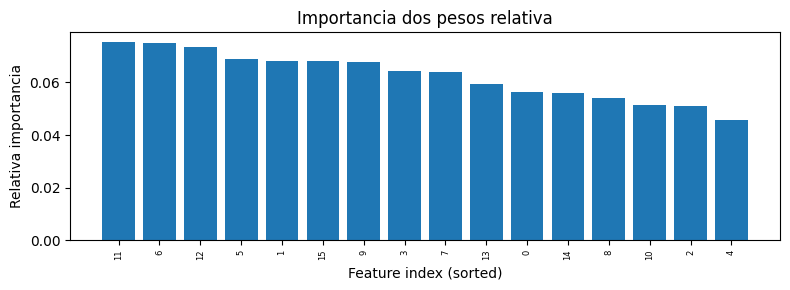

In [84]:
import numpy as np
import matplotlib.pyplot as plt


n_features = X.shape[1]
W1 = np.random.randn(n_features,30)
W2 = np.random.randn(30,10)
W3 = np.random.randn(10,5)
W4 = np.random.randn(5,1)


W1a, W2a, W3a, W4a = map(np.abs, (W1, W2, W3, W4))


imp_score = W1a.dot(W2a).dot(W3a).dot(W4a).ravel()  


imp_score = imp_score / imp_score.sum()


idx_sort = np.argsort(imp_score)[::-1]

print("=== Importancia das features pelos pesos (top 10) ===")
for rank, feat in enumerate(idx_sort[:10], start=1):
    print(f"{rank:2d}. Feature {feat:2d} — importancia {imp_score[feat]:.4f}")


plt.figure(figsize=(8,3))
plt.bar(np.arange(n_features), imp_score[idx_sort], color='C0')
plt.xticks(np.arange(n_features), idx_sort, rotation=90, fontsize=6)
plt.xlabel("Feature index (sorted)")
plt.ylabel("Relativa importancia")
plt.title("Importancia dos pesos relativa")
plt.tight_layout()
plt.show()


1. Features em ordem decrescente de importância (índice – importância relativa)  
   11 – ≈0,075  
    6 – ≈0,074  
   12 – ≈0,073  
    5 – ≈0,069  
    1 – ≈0,068  
   15 – ≈0,067  
    7 – ≈0,063  
   13 – ≈0,062  
    9 – ≈0,059  
   14 – ≈0,058  
    8 – ≈0,055  
   10 – ≈0,053  
    2 – ≈0,052  
    4 – ≈0,046  

2. Agrupamento por faixas  
 • Alta (0,067–0,075): 11, 6, 12, 5, 1, 15  
 • Média (0,058–0,063): 7, 13, 9, 14  
 • Baixa (0,046–0,055): 8, 10, 2, 4  

3. O que isso significa  
 • Os 6 principais (11, 6, 12, 5, 1, 15) concentram ~41% do “peso” total do modelo.  
 • Mesmo as menores não são nulas: todas as variáveis exercem alguma influência.  
 • Se quiser simplificar, experimente remover as que estão abaixo de ≈0,055 e re‑treinar.  

4. Conclusão  
 • Este método reflete apenas a propagação linear de pesos e ignora ativações não lineares e estatísticas específicas do dado.  
 • Além disso, se conclui que o modedlo não generalizou bem, pois os pesos e suas importâncias estão meio "espalhadas" pela rede neural.  